<img src="./images/shouke_logo.png"
     style="float: right"
     width=100
     style="padding-bottom:100px;"/>
<br>
<br>

<table style="float:center;">
    <tr>
        <td>
            <img src='./images/python-logo.png'width=130>
        </td>
        <td>
            <img src='./images/pandas-logo.png'width=150>
        </td>
    </tr>
</table>

<h1 style='text-align: center;'>Detecting Missing Values in the DataFrame</h1>
<h3 style='text-align: center;'>Shouke Wei, Ph.D. Professor</h3>
<h4 style='text-align: center;'>Email: shouke.wei@gmail.com</h4>

## Objective
- learn how to detect the missing values in the dataframe with different methods 

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data 
df = pd.read_csv('./data/gdp_china_renamed.csv')

# display columns
df.columns

Index(['prov', 'gdpr', 'year', 'gdp', 'pop', 'finv', 'trade', 'fexpen',
       'uinc'],
      dtype='object')

## 1. Check whether there are any missings

### (1) Using info( ) function

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prov    95 non-null     object 
 1   gdpr    95 non-null     object 
 2   year    95 non-null     int64  
 3   gdp     95 non-null     float64
 4   pop     93 non-null     float64
 5   finv    95 non-null     float64
 6   trade   95 non-null     float64
 7   fexpen  95 non-null     float64
 8   uinc    95 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 6.8+ KB


### (2) Using simple line plot

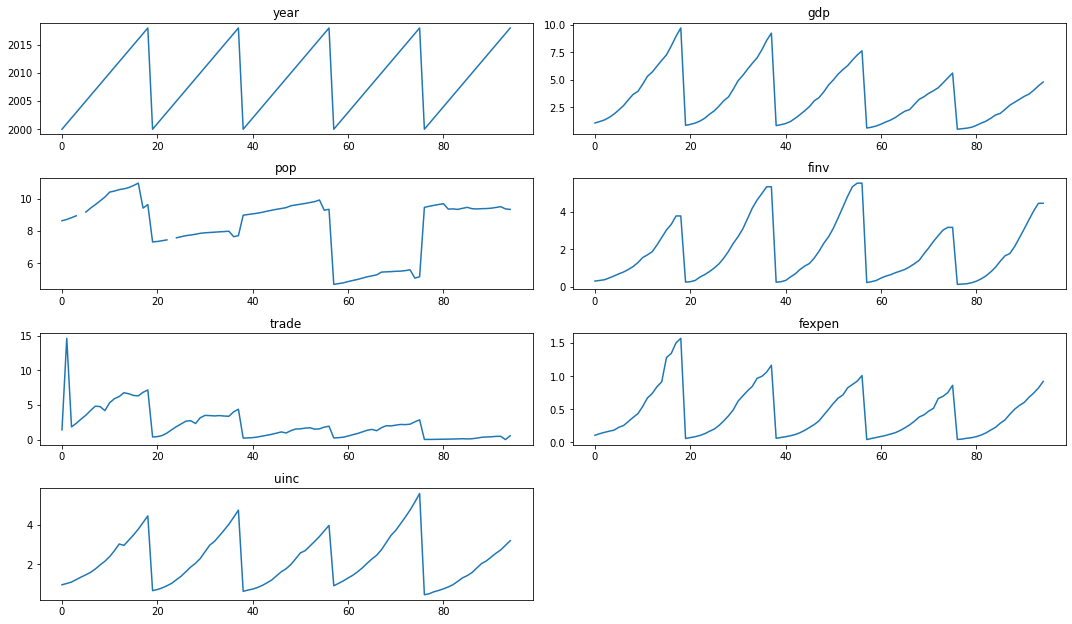

In [4]:
cols = ['year', 'gdp', 'pop', 'finv', 'trade', 'fexpen','uinc']
plt.figure(figsize=(15,15))

for i, each in enumerate(cols):
    plt.subplot(len(cols),2,i+1)
    plt.plot(df[each])
    plt.title(each)
    plt.tight_layout()
plt.show()

### (3) Using heatmap

<AxesSubplot:>

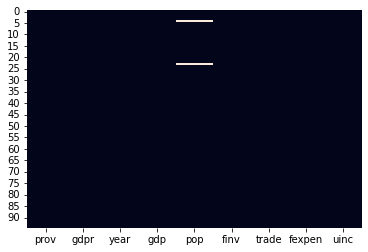

In [7]:
sns.heatmap(df.isna(),cbar=False) # isnull

### (4) isna() method

In [10]:
df.isna().any()

prov      False
gdpr      False
year      False
gdp       False
pop        True
finv      False
trade     False
fexpen    False
uinc      False
dtype: bool

## 2. The frequency of Missings (absolute)

In [12]:
df.isna().sum().sum()

2

## 3. Determine row index of the missings

In [13]:
# display as Dataframe
df[df['pop'].isna()]

,prov,gdpr,year,gdp,pop,finv,trade,fexpen,uinc
4,Guangdong,First,2004,1.886462,NaN,0.587002,2.955899,0.185295,1.362765
23,Jiangsu,Second,2004,1.500360,NaN,0.655705,1.414083,0.131204,1.048193


In [14]:
# using pandas index
df[df['pop'].isna()].index

Int64Index([4, 23], dtype='int64')

In [15]:
# using numpy where
np.where(df['pop'].isna())

(array([ 4, 23], dtype=int64),)